# MinimumShareProduction

- Use `NemoMod MinimumShareProduction` to capture planned energy mix
- Note that there are some conflicting statements between sources:
    - 2023 IEA Energy transition plan says (p. 13): _Uganda would need to accelerate domestic end-use electrification efforts and greatly expand electricity exports to realise prior ambitions of installing 52 GW of generating capacity by 2040. These efforts could include earlier adoption of carbon capture, utilisation and storage (CCUS) and electrolytic hydrogen._
        - **NOTE** this is interpreted as _total capacity_ by 2040 as, on page 60, the report says: _The Energy Policy for Uganda 2023 states that by 2040 the country aims to have around 52 GW of installed capacity, which at healthy levels of utilisation would generate about 240 TWh annually_
- However, the Vision 2040 document states (list formatting added):
    - _The required capacity will be generated from different energy sources, namely_:
        - _hydro power (4500MW)_
        - _geo-thermal (1500 MW)_
        - _nuclear (24000 MW)_
        - _solar (5000 MW)_
        - _biomass (1700 MW)_
        - _peat (800 MW)_
        - _thermal (4300)_
    - Note that this totals 41.8 GW, ≈ 10.2 GW less than the ETP
- Additionally, installed capacity can guide production share, but it cannot define it

      

In [1]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import os, os.path
import pandas as pd
import pathlib
import sisepuede.core.support_classes as sc
import sisepuede.manager.sisepuede_file_structure as sfs
import sisepuede.manager.sisepuede_models as sm
import sisepuede.utilities._toolbox as sf
import utils.common_data_needs as cdn
import warnings
warnings.filterwarnings("ignore")

from typing import *

plt.style.use("dark_background", )



/opt/miniconda3/envs/sisepuede/lib/python3.11/site-packages/sisepuede/core/model_attributes.py:6684: UserWarning: 

                        MISSIONSEARCHNOTE: As of 2023-10-06, there is a temporary solution 
                        implemeted in ModelAttributes.get_variable_to_simplex_group_dictionary() 
                        to ensure that transition probability rows are enforced on a simplex.
                        
                        
                        FIX THIS ASAP TO DERIVE PROPERLY.
                        
                        
  warnings.warn(
/opt/miniconda3/envs/sisepuede/lib/python3.11/site-packages/sisepuede/utilities/_toolbox.py:2551: UserWarning: Warning passed from optional_log: Successfully archived self.model_attributes to pickle at '/opt/miniconda3/envs/sisepuede/lib/python3.11/site-packages/sisepuede/out/sisepuede_run_2025-07-16T08;52;40.501550/sisepuede_run_2025-07-16T08;52;40.501550_model_attributes.pkl'.
  warnings.warn(f"Warning passed from optio

[juliapkg] Found dependencies: /opt/miniconda3/envs/sisepuede/lib/python3.11/site-packages/juliapkg/juliapkg.json
[juliapkg] Found dependencies: /opt/miniconda3/envs/sisepuede/lib/python3.11/site-packages/sisepuede/julia/pyjuliapkg/juliapkg.json
[juliapkg] Found dependencies: /opt/miniconda3/envs/sisepuede/lib/python3.11/site-packages/juliacall/juliapkg.json
[juliapkg] Locating Julia ^1.11.5
[juliapkg] Using Julia 1.11.5 at /Users/usuario/.julia/juliaup/julia-1.11.5+0.aarch64.apple.darwin14/bin/julia
[juliapkg] Using Julia project at /opt/miniconda3/envs/sisepuede/lib/python3.11/site-packages/sisepuede/julia
[juliapkg] Installing packages:
           julia> import Pkg
           julia> Pkg.Registry.update()
           julia> Pkg.add([Pkg.PackageSpec(name="Cbc", uuid="9961bab8-2fa3-5c5a-9d89-47fab24efd76"), Pkg.PackageSpec(name="Clp", uuid="e2554f3b-3117-50c0-817c-e040a3ddf72d"), Pkg.PackageSpec(name="DataFrames", uuid="a93c6f00-e57d-5684-b7b6-d8193f3e46c0"), Pkg.PackageSpec(name="GLPK"

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed HiGHS ─ v1.18.2
    Updating `/opt/miniconda3/envs/sisepuede/lib/python3.11/site-packages/sisepuede/julia/Project.toml`
  [9961bab8] + Cbc v1.2.0
  [e2554f3b] + Clp v1.2.2
  [a93c6f00] + DataFrames v1.7.0
  [60bf3e95] + GLPK v1.2.1
  [87dc4568] + HiGHS v1.18.2
  [b6b21f68] + Ipopt v1.10.6
  [4076af6c] + JuMP v1.26.0
  [a3c327a0] + NemoMod v2.0.0 `https://github.com/sei-international/NemoMod.jl.git#61e63e0`
⌅ [6099a3de] + PythonCall v0.9.22
  [0aa819cd] + SQLite v1.6.1
    Updating `/opt/miniconda3/envs/sisepuede/lib/python3.11/site-packages/sisepuede/julia/Manifest.toml`
  [6e4b80f9] + BenchmarkTools v1.6.0
  [9961bab8] + Cbc v1.2.0
  [e2554f3b] + Clp v1.2.2
  [523fee87] + CodecBzip2 v0.8.5
  [944b1d66] + CodecZlib v0.7.8
  [bbf7d656] + CommonSubexpressions v0.3.1
  [34da2185] + Compat v4.17.0
  [992eb4ea] + CondaPkg v0.2.29
  [88353bc9] + ConfParser v0.1.2
  [a8cc5b0e] + Crayons v

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


Precompiling NemoMod...
Info Given NemoMod was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
   1194.2 ms  ? NemoMod
[ Info: Precompiling NemoMod [a3c327a0-d2f0-11e8-37fd-d12fd35c3c72] 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
┌ Info: Skipping precompilation due to precompilable error. Importing NemoMod [a3c327a0-d2f0-11e8-37fd-d12fd35c3c72].
└   exception = Error when precompiling module, potentially caused by a __precompile__(false) declaration in the module.
/opt/miniconda3/envs/sisepuede/lib/python3.11/site-packages/sisepuede/utilities/_toolbox.py:2551: UserWarning: Warning passed from optional_log: Successfully initialized JuMP optimizer from solver module HiGHS..
  warnings.warn(f"Warning passed from optional_log: {msg}.")


In [21]:
dict_ssp = cdn._setup_sisepuede_elements()

matt = dict_ssp.get("model_attributes", )
models = dict_ssp.get("models", )
regions = dict_ssp.get("regions", )
time_periods = dict_ssp.get("time_periods", )

# setup region
_REGION_NAME = "uganda"
_REGION_ISO = regions.return_region_or_iso(_REGION_NAME, return_type = "iso")


# SET SOME GLOBALS

# uganda data frame
df_uganda = cdn.get_raw_ssp_inputs()


# set some energy categories
_CAT_ENTC_BIOMASS = "pp_biomass"
_CAT_ENTC_GEO = "pp_geothermal"
_CAT_ENTC_HYD = "pp_hydropower"
_CAT_ENTC_NUC = "pp_nuclear"
_CAT_ENTC_OIL = "pp_oil"
_CAT_ENTC_SOLAR = "pp_solar"
_CAT_ENTC_WIND = "pp_wind"

# fields
_FIELD_RAMP = "vec_ramp"

# years
_YEAR_0_BIOMASS_DROP = 2030    # set a year for biomass to start reducing its magnitude in MSP
_YEAR_TARGET = 2100            # year to build estimates out to

# Load data we'll work with

- See Figure 2.22 for projections of production share in 2030, 2040, and 2050
- Of note, on page 28, it is noted that "bioenergy and waste" is a catch all that includes both (1) current biomass use and (2) future shifts to other sources:
    - "_Concurrent with this growth is a concerted effort to reduce the use of solid biomass--almost 90% of current final energy consumption--to modern energy. By 2030, transitioning households and the services sector to cleaner forms of cooking and water heating, and the industry sector to more efficient and modern fuels, drastically reduces the use of solid biomass. By 2050, all remaining bioenergy is in the form of liquid biofuels, biogases, recovered solid bio-waste, and sustainably harvested and processed solid biomass._"
    - To leave room in the model for waste and biogas from capture, we **halve** the estimated biomass fraction in 2050; we do not specify these in minimum share of production because the total available supply is estimated from other points in the model
![Figure 2.22](./input_data/iea_etp/fig_2_22_electricity_production_shares_projected.png)

## Using a graphic comparison, estimate fractions





<Axes: xlabel='year'>

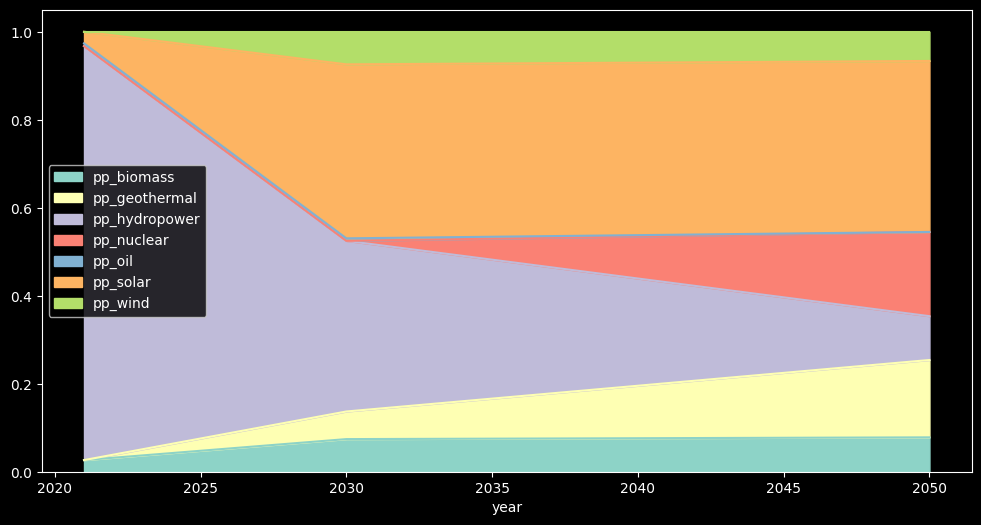

In [239]:

# weights were estimated using pixels
df_fracs = {
    time_periods.field_year: [2021, 2030, 2050],
    _CAT_ENTC_BIOMASS: [13, 39, 40],
    _CAT_ENTC_GEO: [0, 33, 90],
    _CAT_ENTC_HYD: [463, 204, 51],
    _CAT_ENTC_NUC: [0, 0, 98],
    _CAT_ENTC_OIL: [3, 3, 0],
    _CAT_ENTC_SOLAR: [13, 208, 199],
    _CAT_ENTC_WIND: [0, 39, 34],
}

df_fracs = pd.DataFrame(df_fracs, )


# normalize
fields_cats_entc = [x for x in df_fracs.keys() if x != time_periods.field_year]
arr = df_fracs[fields_cats_entc].to_numpy()
df_fracs[fields_cats_entc] = (arr.transpose()/arr.sum(axis = 1)).transpose()

# note that the total is slightly below 1 by 2050 due to the extra room for biomass
fig, ax = plt.subplots(figsize = (12, 6))
df_fracs.plot.area(x = time_periods.field_year, ax = ax)

## Nose validation plot
- Compare roughyl to left panel

<Axes: xlabel='year'>

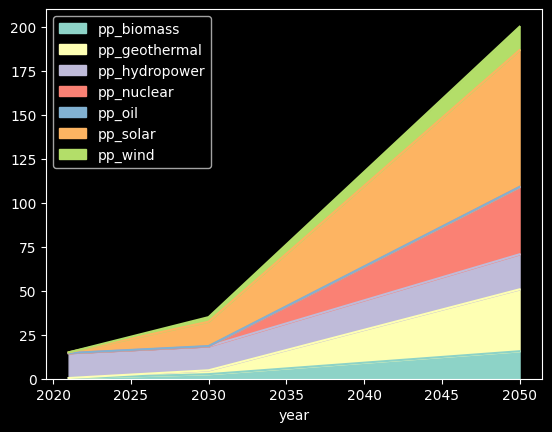

In [276]:
vec_totals = np.array([15, 35, 200])
df_fracs_plot = df_fracs.copy()
arr = df_fracs_plot[fields_cats_entc].to_numpy()
df_fracs_plot[fields_cats_entc] = (arr.transpose()*vec_totals).transpose()

df_fracs_plot.plot.area(x = "year")

# Get all years, merge, interpolate, and add "weights"
- We adjust fractions of data in IEA to get historical
    - Adjust 2021 fractions in IEA to match those in ETP using scalars, then apply retroactively to IEA (note that they are very similar)
    - Then, fill with biomass (only missing category)
    - Normalize
- After 2050, we have no information
    - We reduce the MSP over time using declining weights; i.e., the total MSP < 1 after 2050. Decrease by some percent/year (default to 1.5%, author decision)
    - All this means is that the share of production coming from other technologies could change after 2050 based on prices etc.

In [289]:
##  FUNCTIONS

def get_era_years(
    path: pathlib.Path,
) -> pd.DataFrame:
    """Retrieve the installed capacity DataFrame. Formats for analysis and adds
        blank fields for future estimates of retirements
    """


    ##  GET THE RAW EXCEL

    df_installed_capacity = (
        pd.read_excel(path, skiprows = 8, )
        .drop(columns = ["Unnamed: 0", "Unnamed: 1"], )
        .rename(columns = {"Unnamed: 2": "TECH"}, )
    )

    fields_capacity_year = [x for x in df_installed_capacity.columns if str(x).isnumeric()]

    return fields_capacity_year



    
##  SOME MODEL ATTRIBUTES DERIVATIONS

# set some variables
modvar_msp = matt.get_variable("NemoMod MinShareProduction")
modvar_rc = matt.get_variable(models.model_enerprod.modvar_entc_nemomod_residual_capacity)

# map fields to cats
dict_cat_to_field_msp = matt.get_category_replacement_field_dict(modvar_msp, )
dict_cat_to_field_rc = matt.get_category_replacement_field_dict(modvar_rc, )
dict_field_to_cat_msp = sf.reverse_dict(dict_cat_to_field_msp, )
dict_field_to_cat_rc = sf.reverse_dict(dict_cat_to_field_rc, )

# fuel category
pycat_enfu = matt.get_subsector_attribute(
    matt.subsec_name_enfu, 
    "pycategory_primary_element",
)
# map power plants to fuels
dict_techs_to_fuel = matt.get_ordered_category_attribute(
    matt.subsec_name_entc,
    f"electricity_generation_{pycat_enfu}",
    clean_attribute_schema_q = True,
    return_type = dict,
    skip_none_q = True,
)

# filter to no CCS
dict_techs_to_fuel_noccs = dict(
    (k, v) for k, v in dict_techs_to_fuel.items() if "ccs" not in k
)

dict_fuel_to_tech_no_ccs = sf.reverse_dict(dict_techs_to_fuel_noccs)




## START DATA FRAME ADJUSTMENTS

# reduce the base data
df_ext = modvar_msp.get_from_dataframe(
    df_uganda, 
    fields_additional = [time_periods.field_year]
)

# use residual capacity to remove any intermediate MSP values that don't exist yet in the interpolation; create a mask
df_rc = pd.read_csv(cdn._PATH_OUTPUTS.joinpath(f"{modvar_rc.name_fs_safe.upper()}.csv"))


# all years to include in dataset
df_years = cdn.spawn_years_space_df((2015, _YEAR_TARGET))
df_fracs_full = (
    pd.merge(
        df_rc[[time_periods.field_year]],
        df_fracs,
        how = "left",
    )
    .interpolate(limit_area = "inside")
    .rename(columns = dict_cat_to_field_msp, )
    .dropna()
    .reset_index(drop = True, )
)

# filter back to years in df_fracs_full to 
df_rc = (
    df_rc[
        df_rc[time_periods.field_year].isin(
            df_fracs_full[time_periods.field_year].unique()
        )
    ]
    .reset_index(drop = True, )
)
vec_total_cap = (
    df_rc
    .drop(columns = time_periods.field_year)
    .sum(axis = 1)
)



##  UPDATE df_fracs_full TO DROP ANY YEARS WITH OBSERVED rc = 0

# read in original rc data
path = cdn._PATH_INPUTS.joinpath("era", "20240604_STA_InstalledGenerationCapacity2000_Todate.xlsx")
fields_capacity_year = get_era_years(path, )

# check that these are comparible
assert (df_rc["year"] == df_fracs_full["year"]).all()

# set a dictionary to store average ratio of msp to residual capacity;
# use to estimate MSP in years when RC is available
dict_avg_ratio_msp_to_rcfrac = {}
inds_hist_rc = np.where(
    df_rc[time_periods.field_year].isin(fields_capacity_year)
)[0]

# iterate
for field in df_fracs_full.columns:
    # get category and RC field
    cat = dict_field_to_cat_msp.get(field)
    if cat is None: continue
    field_rc = dict_cat_to_field_rc.get(cat)
    
    # build the mask to apply to msp
    col = df_rc[field_rc].values
    vec_mask = (df_rc[field_rc].values > 0).astype(float)

    # get historical ratio of msp to rc
    vec_hist_msp_to_rc = np.nan_to_num(
        df_fracs_full[field].to_numpy()/
        (df_rc[field_rc].to_numpy()/vec_total_cap),
        nan = 1.0,
        posinf = 1.0,
    )

    # get the estimated ratio
    factor = vec_hist_msp_to_rc[inds_hist_rc].mean()
    dict_avg_ratio_msp_to_rcfrac.update({field: factor, })
    
    if vec_mask[0] == 1: continue

    

    

    # now, if any mask is in place, we apply
    for i, el in enumerate(df_fracs_full[field]):

        yr = df_fracs_full[time_periods.field_year].iloc[i]
        
        # if no rc is there, set msp to 0
        if (vec_mask[i] == 0) & (yr <= max(fields_capacity_year)):
            df_fracs_full[field].iloc[i] = 0
            continue

        # check the year; if in the original df, keep value
        if (yr in df_fracs[time_periods.field_year].unique()):
            continue

        # otherwise, set to na
        df_fracs_full[field].iloc[i] = np.nan

    


## IEA data are used to build base fractions. Check the years contained in that dataset...

In [291]:
# read in data
data_elec = pd.read_csv(
    cdn._PATH_INPUTS.joinpath("iea", "International Energy Agency - electricity generation sources in Uganda.csv")
)
yrs_obs_iea = data_elec["Year"].unique()
yrs_est_from_rc = [x for x in fields_capacity_year if x not in yrs_obs_iea]
# 

### estimate MSP base from installed capacity for years where RC is available by MSP is not

In [307]:
def est_msp_from_rc(
) -> pd.DataFrame:
    """Estimate minimum share of production as function of residual 
        capacity. If no valid years are found, returns None.
    """
    
    if len(yrs_est_from_rc) == 0:
        return None

    # build est
    dict_rnm = {}
    df_est_msp_from_rc = df_rc[
        df_rc[time_periods.field_year]
        .isin(yrs_est_from_rc)
    ].copy()

    # convert to fractions
    flds = [x for x in df_est_msp_from_rc.columns if x != time_periods.field_year]
    arr = df_est_msp_from_rc[flds].to_numpy().copy()
    arr = (arr.transpose()/arr.sum(axis = 1)).transpose()
    df_est_msp_from_rc[flds] = arr
    
    
    for field in df_fracs_full.columns:
        # get category and RC field
        cat = dict_field_to_cat_msp.get(field)
        if cat is None: continue
        field_rc = dict_cat_to_field_rc.get(cat)

        dict_rnm.update({field_rc: field})

        df_est_msp_from_rc[field_rc] *= dict_avg_ratio_msp_to_rcfrac.get(field, 1.0)

    # normalize again, then rename
    arr = df_est_msp_from_rc[flds].to_numpy().copy()
    arr = (arr.transpose()/arr.sum(axis = 1)).transpose()
    df_est_msp_from_rc[flds] = arr
    
    df_est_msp_from_rc.rename(
        columns = dict_rnm,
        inplace = True, 
    )
    
    return df_est_msp_from_rc

df_fracs_rest_of_hist = est_msp_from_rc()

###  Now, get scalars for those fuels that are in IEA but not in Uganda data
- We take this approach because the fractions are very similar
- Minor adjustments will reflcet 

In [394]:
yrs_shared = set(yrs_obs_iea) & set(df_fracs_full.dropna()[time_periods.field_year])
yrs_shared &= set(df_uganda[time_periods.field_year])

"""
##  YOU CAN USE THIS TO LOOK AT THE SHARED FRACTIONS

# fracions specified
df_fracs1 = modvar_msp.get_from_dataframe(
    df_fracs_comp,
    extraction_logic = "any",
    fields_additional = [time_periods.field_year],
)
df_fracs1 = df_fracs1[[x for x in df_fracs1.columns if df_fracs1[x].max() > 0]]

# uganda base data
df_ug1 = modvar_msp.get_from_dataframe(
    df_uganda_comp,
    extraction_logic = "any",
    fields_additional = [time_periods.field_year],
)
df_ug1 = df_ug1[[x for x in df_ug1.columns if df_ug1[x].max() > 0]]
""";


# get comparison from estimated fracs
df_fracs_comp = (
    df_fracs_full[
        df_fracs_full[time_periods.field_year].isin(yrs_shared)
    ]
    .sort_values(by = [time_periods.field_year])
)
arr_fracs_comp = modvar_msp.get_from_dataframe(
    df_fracs_comp,
    extraction_logic = "any_fill",
    return_type = "array",
)

# get comparison from IEA data
df_uganda_comp = (
    df_uganda[
        df_uganda[time_periods.field_year].isin(yrs_shared)
    ]
    .sort_values(by = [time_periods.field_year])
)
arr_uganda_comp = modvar_msp.get_from_dataframe(
    df_uganda_comp,
    extraction_logic = "any_fill",
    return_type = "array",
)

# get some scalars to adjust historical IEA MSP
scalars = np.nan_to_num(arr_fracs_comp/arr_uganda_comp, nan = 1)
scalars_avg = scalars.mean(axis = 0)

# get row to apply scalar to
df_ug_to_scale = (
    modvar_msp
    .get_from_dataframe(
        df_uganda[
            df_uganda[time_periods.field_year] <= yrs_obs_iea.max()
        ],
        extraction_logic = "any_fill",
        fields_additional = [time_periods.field_year],
    )
)


# adjust df_ug_to_scale
arr = df_ug_to_scale[modvar_msp.fields].to_numpy().copy()*scalars_avg
arr = (arr.transpose()/arr.sum(axis = 1)).transpose()
df_ug_to_scale[modvar_msp.fields] = arr

# adjust fracs_full
flds = [x for x in df_fracs_full.columns if x in modvar_msp.fields]
arr = df_fracs_full[flds].to_numpy().copy()
arr = (arr.transpose()/arr.sum(axis = 1)).transpose()
df_fracs_full[flds] = arr


df_fracs_with_adj = (
    pd.concat(
        [
            df_ug_to_scale, 
            df_fracs_rest_of_hist,
            df_fracs_full[
                df_fracs_full[time_periods.field_year] > max(yrs_est_from_rc)
            ]
        ],
        axis = 0,
    )
    .interpolate()#limit_area = "inside", )
    .bfill()
    .fillna(0)
)


##  SPECIFY A REDUCTION IN BIOMASS

# build a ramp
[x for x in dir(sf) if "ramp" in x]
vec_ramp = sf.ramp_vector(
    df_fracs_with_adj.shape[0],
    r_0 = np.where(df_fracs_with_adj[time_periods.field_year] == _YEAR_0_BIOMASS_DROP)[0][0],
)
vec_ramp = 1 - 0.5*vec_ramp

# set in a dataframe
df_ramp = pd.DataFrame(
    {
        time_periods.field_year: df_fracs_with_adj[time_periods.field_year].to_numpy(),
        _FIELD_RAMP: vec_ramp,
    }
)

# merge and adjust biomass
df_fracs_with_adj = pd.merge(
    df_fracs_with_adj, 
    df_ramp,
    how = "left"
)

field_adj = modvar_msp.build_fields(category_restrictions = _CAT_ENTC_BIOMASS, )
df_fracs_with_adj[field_adj] *= df_fracs_with_adj[_FIELD_RAMP].to_numpy()
df_fracs_with_adj.drop(
    columns = _FIELD_RAMP,
    inplace = True,
)


# Plot to see up to 2050

<Axes: xlabel='year'>

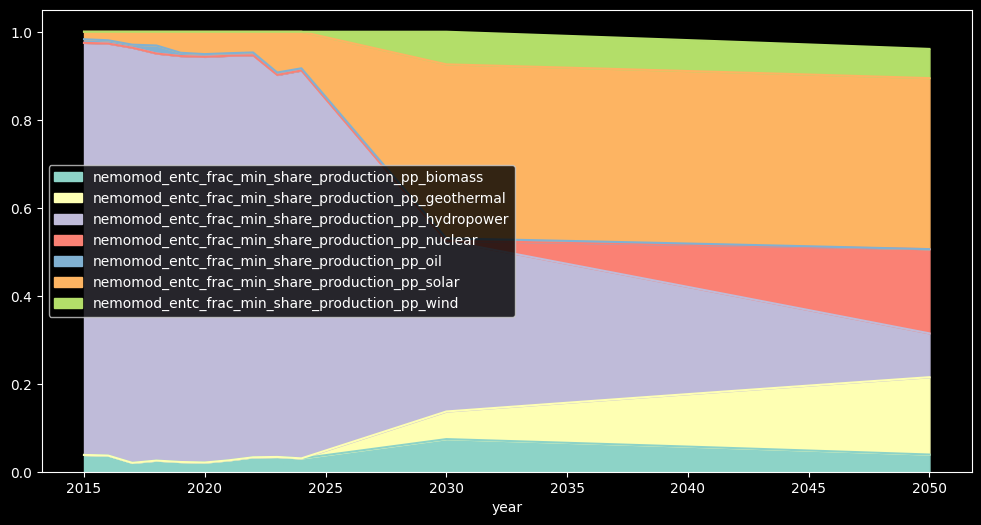

In [376]:
fig, ax = plt.subplots(figsize = (12, 6))

df_plot = [x for x in df_fracs_with_adj.columns if df_fracs_with_adj[x].max() > 0]
df_plot = [x for x in df_plot if x != _FIELD_RAMP]
df_plot = df_fracs_with_adj[df_plot]

df_plot.plot.area(ax = ax, x = time_periods.field_year)



# Finally, ramp down the MSP total post 2050
- We don't know what the share looks like, we'll let least cost sort it out

In [414]:
# get the set of years
df_space_years = pd.DataFrame(
    {
        time_periods.field_year: range(
            df_fracs_with_adj[time_periods.field_year].min(),
            _YEAR_TARGET + 1,
        ),
    }
)

# build a ramp
vec_ramp = sf.ramp_vector(
    df_space_years.shape[0],
    r_0 = np.where(df_space_years[time_periods.field_year] == df_fracs_with_adj[time_periods.field_year].max())[0][0],
)
vec_ramp = 1 - vec_ramp

# set in a dataframe
df_ramp = pd.DataFrame(
    {
        time_periods.field_year: df_space_years[time_periods.field_year].to_numpy(),
        _FIELD_RAMP: vec_ramp,
    }
)

# merge and adjust biomass
df_msp = (
    pd.merge(
        df_ramp,
        df_fracs_with_adj, 
        how = "left"
    )
    .ffill()
)


arr = df_msp[modvar_msp.fields].to_numpy().copy()
df_msp[modvar_msp.fields] = (arr.transpose()*df_msp[_FIELD_RAMP].to_numpy()).transpose()

# Finally, plot the `MinShareProduction` Numbers

<Axes: xlabel='year'>

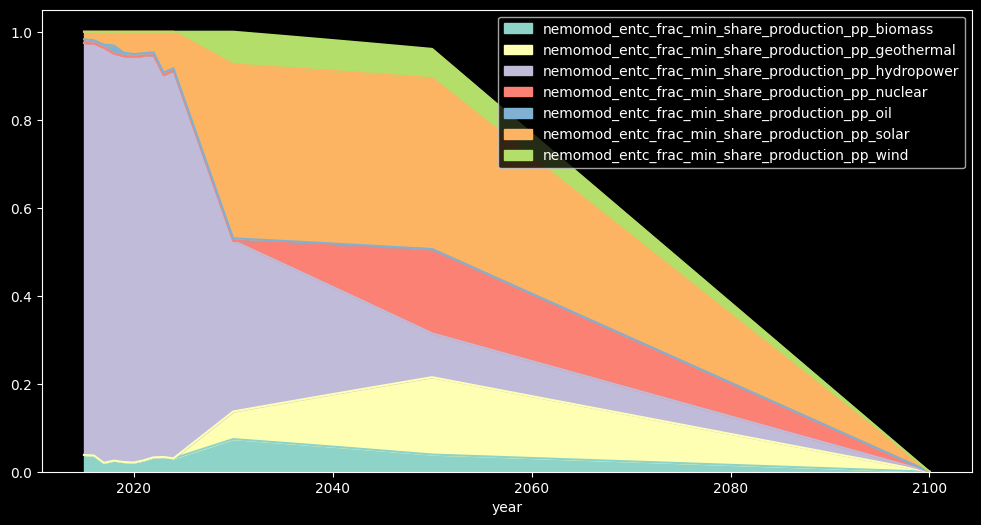

In [417]:
fig, ax = plt.subplots(figsize = (12, 6))

df_plot = [x for x in df_msp.columns if df_msp[x].max() > 0]
df_plot = [x for x in df_plot if x != _FIELD_RAMP]
df_plot = df_msp[df_plot]

df_plot.plot.area(ax = ax, x = time_periods.field_year)



# Write to output

In [421]:
df_msp.to_csv(
    cdn._PATH_OUTPUTS.joinpath(f"{modvar_msp.name_fs_safe.upper()}.csv"),
    encoding = "UTF-8",
    index = None,
)